In [6]:
# Init. This code snippet should be hidden in final output.
img_folder = '30_Correlation'
img_path = './' + img_folder + '/'

# setup vector for latex
from matplotlib.pyplot import *
%matplotlib inline 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

In [ ]:
%load_ext tikzmagic

# Generalization

So far we have seen Covariance for discrete X, Y random variables. This could easily be transferred to continuous variables as well. However before generalization of the formula, we need to generalize the way the sample set is provided as well. 

Suppose the sample set is given as $(X,Y) = (x_1,y_1), (x_2, y_2), (x_3, y_3) \cdots (x_N, y_N)$ then, if we say equi probable, then $p(X,Y)$ could be simply tabulated in different ways  depending on the function $h(X,Y)$ that is, if we take the deformed or standard formula. This is illustrated in figure $\ref{fig:C4_001}$. 

This was simply because, of the way we indexed the sample points. In Plot A, we do not have a $(x_2, y_1)$, because we just numbered as $(x_1,y_1), (x_2, y_2), (x_3, y_3) \cdots (x_N, y_N)$, and it worked because standard formula needed only one time indexing via $i$. But in Plot B, we had double indexing via $i,j$, this is why the probability at each _cell_ also became $1/N^2$. Most often we do not use the deformed formula and stick to standard formula. Further, often the given probability density function (if given), would be something like this. 

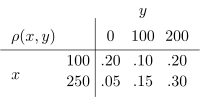

In [8]:
%%tikz -l matrix,positioning,calc -s 200,100 -f svg
    \matrix (table) [matrix of math nodes,nodes in empty cells]
    {\rho(x,y) & & 0 & 100 & 200\\
     & 100 & .20 & .10 & .20\\
     & 250 & .05 & .15 & .30\\
    };
    \draw ($(table-2-1)!0.5!(table-3-1)$) coordinate (aux) (aux.center -| table-1-1.west) node[anchor=west]{$x$};
    \node[above=1pt of table-1-4] {$y$};
    \draw ($(table-2-2.east)!0.5!(table-2-3.west)$) coordinate (aux2)(table.north -| aux2) -- (table.south -| aux2);
    \draw ($(table-1-1.south)!0.5!(table-2-2.north)$) coordinate (aux3) (table.west |- aux3) -- (table.east |- aux3);    

Here our indexing style has to differ. Now we have $(x_1,x_2) = (100,250)$ and $(y_1,y_2,y_3) = (0,100,200)$. If we line up these sample pairs, we get

$$
(x_1, y_1), (x_1, y_2), (x_1, y_3), (x_2, y_1), (x_2, y_2), (x_2, y_3)
$$

Thus even with standard formula due to data being in a different format, we would need to use double summation in order to vary i and j to different limits separately. Thus naturally our standard formula would become

$$
\mathrm{Cov}(X,Y) = \sum\limits_{i=1}^2\sum\limits_{j=1}^3(x_i - \overline{x})(y_j - \overline{y})p(x_i , y_i)
$$

Generalizing the standard formula, and also extending to continuous X and Y, we could say, 

Depending on samples are from population or we deal with entire population, either $\overline{x}$ or $\mu_X$ could be used respectively. 

# Example 

We have already explained the concept with an example, so here will see a different approach. 

Suppose joint and marginal pmf's for X = automobile policy deductible amount and Y = homeowner policy deductible amount are as below. Find the covariance. 

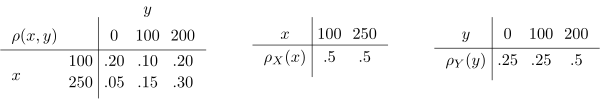

In [9]:
%%tikz -l matrix,positioning,calc -s 600,100 -f svg
    \matrix (table) [matrix of math nodes,nodes in empty cells]
    {\rho(x,y) & & 0 & 100 & 200\\
     & 100 & .20 & .10 & .20\\
     & 250 & .05 & .15 & .30\\
    };
    \draw ($(table-2-1)!0.5!(table-3-1)$) coordinate (aux) (aux.center -| table-1-1.west) node[anchor=west]{$x$};
    \node[above=1pt of table-1-4] {$y$};
    \draw ($(table-2-2.east)!0.5!(table-2-3.west)$) coordinate (aux2)(table.north -| aux2) -- (table.south -| aux2);
    \draw ($(table-1-1.south)!0.5!(table-2-2.north)$) coordinate (aux3) (table.west |- aux3) -- (table.east |- aux3); 
    \matrix (table_x) [%
        right=1cm of table.north east, anchor=north west,
        matrix of math nodes,nodes in empty cells
    ]
    {x & 100 & 250 \\
     \rho_X(x) & .5 & .5 \\
    };
    \draw ($(table_x-2-1.east)!0!(table_x-1-1.west)$) coordinate (aux4) (table_x.north -| aux4) -- (table_x.south -| aux4);
    \draw ($(table_x-1-1.south)!0.5!(table_x-2-2.north)$) coordinate (aux5) (table_x.west |- aux5) -- (table_x.east |- aux5);
    
    \matrix (table_y) [%
        right=1cm of table_x.north east, anchor=north west,
        matrix of math nodes,nodes in empty cells
    ]
    {y & 0 & 100 & 200 \\
     \rho_Y(y) & .25 & .25 & .5 \\
    };
    \draw ($(table_y-2-1.east)!0!(table_y-1-1.west)$) coordinate (aux6) (table_y.north -| aux6) -- (table_y.south -| aux6);
    \draw ($(table_y-1-1.south)!0.5!(table_y-2-2.north)$) coordinate (aux7) (table_y.west |- aux7) -- (table_y.east |- aux7);       

Since we need the means in the equation, let us calculate them first.  

$$
\begin{aligned}
\mu_x = \sum\limits_{i=1}^2x_ip_X(x_i) = 100(0.5) + 250(0.5) = 175 \\
\mu_y = \sum\limits_{i=1}^2y_ip_Y(y_i) = 0(0.25) + 100(0.25) + 200(0.5) = 125
\end{aligned}
$$

Coming to Covariance,

$$\begin{aligned}
\mathrm{Cov}(X,Y) = \sum\limits_{i=1}^{2}\sum\limits_{j=1}^{3}(x_i - \mu_x)(y_j - \mu_y)p(x_i,y_j) \\
= (x_1 - 175)(y_1 - 125)p(x_1,y_1) + (x_1 - 175)(y_2 - 125)p(x_1,y_2) + (x_1 - 175)(y_3 - 125)p(x_1,y_3) \\
+ (x_2 - 175)(y_1 - 125)p(x_2,y_1) + (x_2 - 175)(y_2 - 125)p(x_2,y_2) + (x_2 - 175)(y_3 - 125)p(x_2,y_3) \\ \\
= (100 - 175)(0 - 125)p(100,0) + (100 - 175)(100 - 125)p(100,100) + (100 - 175)(200 - 125)p(100,200) \\
+ (250 - 175)(0 - 125)p(250,0) + (250 - 175)(100 - 125)p(250,100) + (250 - 175)(200 - 125)p(250,200) \\ \\
= (100 - 175)(0 - 125)0.20 + (100 - 175)(100 - 125)0.10 + (100 - 175)(200 - 125)0.20 \\
+ (250 - 175)(0 - 125)0.05 + (250 - 175)(100 - 125)0.15 + (250 - 175)(200 - 125)0.30 \\ \\
= 1875
\end{aligned}$$

What just happpened?  Earlier, when we visualized TIA for random samples, we assumed that $h(X,Y)$ had equal probability for all of its values, thus resulting in a constant probability for entire summation. So it was enough if we look at it from the sky or top or whatever. If the probability density in the summation is a variable, then just by looking at 2D, we are missing the _contribution_ of pmf to the summation. Now that we have varying pmf for different pairs of $x,y$, we need to account for that, because pairs having higher probability will attract more samples than those that would not, thus potentially forming a relationship between X and Y. This is evident the moment we visualize in 3D as shown in figure $\ref{fig:C4_002}$. In 3D, it is evident now, the green has more volume, than red, so we could expect higher samples in these region than the red, thus suggesting in fact a _positive_ correlation. Thus, yeah it is no more just a TIA ,but **total interested volume, TIV**.  

How come we took all possible pairs of $(x,y)$ given in joing pmf as _samples_? A pmf resembles all possible values of $(x,y)$, so could imagine, sample set of all possible values in any multiples (1 occurance per pair, or 10 occurance per pair, etc). 

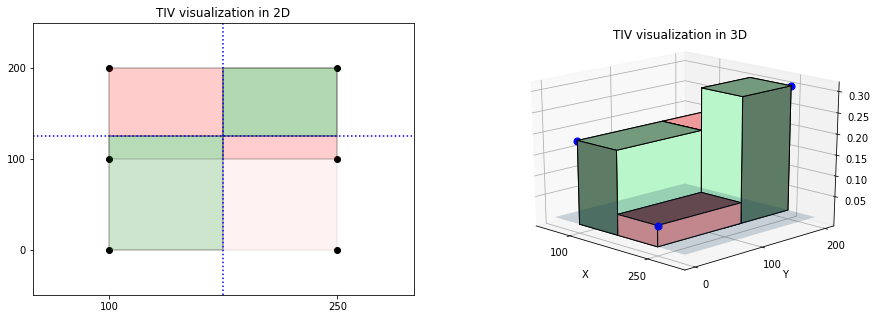

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from itertools import product
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


X , Y = [100,250], [0,100,200]
xb, yb = 175, 125

import pandas as pd
matrix = np.array([
        [0.20, 0.10, 0.20],
        [0.05, 0.15, 0.30]
        ])
df = pd.DataFrame(matrix, columns=Y)
df.index = [100, 250]

top = 1
fig = plt.figure(figsize=(15,5))

# 2D projection
ax1 = fig.add_subplot(121)
for xy in product(X,Y):
    x,y = xy[0], xy[1]
    z = df.loc[x,y]
    d1, d2 = xb - x, yb - y
    color = 'green' if d1*d2 > 0 else 'red'
    ax1.add_patch(patches.Rectangle((x, y), d1, d2, alpha=z, facecolor=color, linewidth=2, edgecolor='black'))
    ax1.scatter(x,y,color='black')
ax1.axvline(x=xb, ls=':', color='blue')
ax1.axhline(y=yb, ls=':', color='blue')
ax1.set_xticks(X)
ax1.set_yticks(Y)
ax1.set_xlim([min(X)-50,max(X)+50])
ax1.set_ylim([min(Y)-50,max(Y)+50])
ax1.set_title('TIV visualization in 2D')


# 3D projection
ax2 = fig.add_subplot(122, projection='3d')
ax2.view_init(elev=20,azim=-45)
xx, yy = np.meshgrid([X[0]-50,X[1]+50],Y)
zz = yy*0
ax2.plot_surface(xx, yy, zz, alpha=0.2)
for xy in product(X,Y):    
    x ,y = xy[0], xy[1]
    z = df.loc[x,y]
#     print(x, y, z)
    width = x - 175
    depth = y - 125
    pro = width*depth
    top = z
    bottom = np.zeros_like(top)
    if pro > 0: #positive
        color='#B9F6CA'
    else:
        color='#EF9A9A'
    ax2.bar3d(x, y, bottom,  -width, -depth, top, color=color, zsort='max', linewidth=1, edgecolor='black')
    ax2.scatter(x, y, z, color='blue',s=50)
ax2.set_xticks(X)
ax2.set_yticks(Y)
ax2.set_zticks([0.05, 0.10, 0.15, 0.20, 0.25, 0.30])
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('TIV visualization in 3D')
   
# def rotate(angle):
#     ax2.view_init(azim=angle)    
#     ax2.set_title(angle)
    
# from matplotlib import animation
# ani = animation.FuncAnimation(fig, rotate, frames=np.arange(0,362,2),interval=100)    
# from IPython.display import HTML
# plt.close()
# HTML(ani.to_jshtml())

plt.show()